### Insurance Benefits

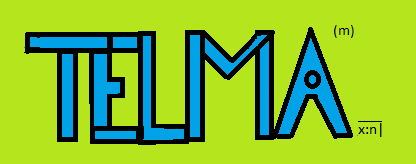

This Notebook aims at introducing some basic insurance operations.
##### Commutations
<br> The Commutation Functions are a computational device to ensure that net<br>
single premiums for life annuities, endowments, and insurances from the same<br>
life table and figured at the same interest rate, for lives of differing ages and<br>
for policies of differing durations, can all be obtained from a single table lookup. 

<br>Historically, this idea has been very important in saving calculational
labor when arriving at premium quotes.
<br>
##### In other words:
Tables of commutation functions simplify the calculation of numerical values
for many actuarial functions. 

In [1]:
import pandas as pd
from telma import InsuranceBenefits

In [2]:
italia = pd.read_csv('italiani.csv').x  ## Old italian cohort sim92
italia

0      100000.0
1       99112.0
2       99061.0
3       99025.0
4       98997.0
         ...   
104        28.0
105        13.0
106         6.0
107         2.0
108         1.0
Name: x, Length: 109, dtype: float64

In [3]:
InsuranceBenefits().commutations(italia, i=.03) # Index is the age

--------------------------------------------------
Commutations results of x:
--------------------------------------------------
Date and Time:  Sat, 24 Jul 2021 13:48:30
Region and Country:  Liguria , IT


,lx,Dx,Nx,Cx,Mx,Rx,Sx
0,100000.0,100000.000000,2.986583e+06,862.135922,13012.104080,800851.556392,7.504330e+07
1,99112.0,96225.242718,2.886583e+06,48.072391,12149.968157,787839.452313,7.205672e+07
2,99061.0,93374.493355,2.790358e+06,32.945100,12101.895766,775689.484156,6.917013e+07
3,99025.0,90621.902817,2.696983e+06,24.877637,12068.950666,763587.588390,6.637978e+07
4,98997.0,87957.552283,2.606361e+06,19.840002,12044.073029,751518.637723,6.368279e+07
...,...,...,...,...,...,...,...
104,28.0,1.294454,2.265096e+00,0.673260,1.188602,1.955324,3.789654e+00
105,13.0,0.583492,9.706420e-01,0.305037,0.515342,0.766722,1.524558e+00
106,6.0,0.261460,3.871502e-01,0.169230,0.210305,0.251380,5.539156e-01
107,2.0,0.084615,1.256901e-01,0.041075,0.041075,0.041075,1.667653e-01


#### Pure Endowment

In [4]:
InsuranceBenefits().pure_endowment(italia, age=22, i=.03)

The Pure Endowment and value for an individual aged 22 
with a length contract of 1 given 1 bucks is:



(0.97, 0.9696958)

In [5]:
InsuranceBenefits().pure_endowment(italia, age=22, i=.03, capital=100000)

The Pure Endowment and value for an individual aged 22 
with a length contract of 1 given 100000 bucks is:



(96969.58, 0.9696958)

In [6]:
InsuranceBenefits().pure_endowment(italia, age=22, i=.03, capital = 100000, n=50)

The Pure Endowment and value for an individual aged 22 
with a length contract of 50 given 100000 bucks is:



(15137.6, 0.151376)

##### Endowment

In [7]:
InsuranceBenefits().endowment(italia, age=22, i=.03, t=40, capital = 100000)

The endowment of age 22: is 32711.37 and his probability is 0.32711371391125166


32711.37

In [8]:
InsuranceBenefits().temporary_annuity(italia, age=22, i=.03, n=40, payments='advance', m=1) ### m = fractional pay per period

The actuarial value of this annuity-advance is:


23.10243

In [9]:
InsuranceBenefits().temporary_annuity(italia, age=22, i=.03, n=40, payments='arrears', m=1)

The actuarial value of this annuity-arrears is:


22.36421

##### If $n$ parameter is omitted it assumed to be paid until death

In [10]:
InsuranceBenefits().temporary_annuity(italia, age=22, i=.03,  payments='advance', m=1)

The actuarial value of this annuity-advance is:


26.63401

In [11]:
InsuranceBenefits().temporary_annuity(italia, age=22, i=.03,  payments='arrears', m=12)

The actuarial value of this annuity-arrears is:


26.0894

#### Deferred annuities
##### If $n$ parameter is omitted it assumed to be paid until death

In [12]:
InsuranceBenefits().deferred_annuity(italia, age=22, i=.03, m=5, n=10, payments='advance')

7.48409

In [13]:
InsuranceBenefits().deferred_annuity(italia, age=22, i=.03, m=5, n=10, payments='arrears')

7.25543

In [14]:
InsuranceBenefits().deferred_annuity(italia, age=22, i=.03, m=5, payments='whole')

Please the payments should be specified as "advance", "arrears", "whole advance" or "whole arrears" either


In [15]:
InsuranceBenefits().deferred_annuity(italia, age=22, i=.03, m=5, payments='whole advance')

21.92828

In [16]:
InsuranceBenefits().deferred_annuity(italia, age=22, i=.03, m=5, payments='whole arrears')

21.0712

#### Life Insurance

In [17]:
InsuranceBenefits().temporary_insurance(italia, age=22, i=.03)

0.00118

In [18]:
InsuranceBenefits().whole_life_insurance(italia, age=22, i=.03)

0.2242515

In [19]:
InsuranceBenefits().whole_life_insurance(italia, age=22, i=.03, kind='immediate')

0.2275904

In [20]:
InsuranceBenefits().increasing_lifeinsurance(italia, 22, i=.03,n=40,kind='temporary')

1.649351

In [21]:
InsuranceBenefits().increasing_lifeinsurance(italia, 22, i=.03)  ## By default it computes "whole"

10.511726

### References
* Arriaga Parra Mario, Sánchez Chibrás José Antonio: ELEMENTOS DE CÁLCULO ACTUARIAL (UNAM)